# Fish, fish fillets, other fish meat and fish livers and roes, frozen

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 12
path = os.getcwd()                                  # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join(path, 'datasets', 'Fish, fish fillets, other fish meat and fish livers and roes, frozen.csv')

df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df = df[:2133]                                   # select index position 0-2133
df

,Country or Area,Year,Unit,Value,Value Footnotes
0,Albania,2003,Thousand metric tons,0.000,NaN
1,Albania,2002,Thousand metric tons,0.000,NaN
2,Albania,2001,Thousand metric tons,0.200,"1,2"
3,Albania,2000,Thousand metric tons,0.206,"1,2"
4,Albania,1999,Thousand metric tons,0.450,"1,2"
...,...,...,...,...,...
2128,Zimbabwe,1999,Thousand metric tons,1.250,"1,2"
2129,Zimbabwe,1998,Thousand metric tons,1.600,"1,2"
2130,Zimbabwe,1997,Thousand metric tons,1.800,"1,2"
2131,Zimbabwe,1996,Thousand metric tons,1.600,"1,2"


In [5]:
df.shape

(2133, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  2133 non-null   object 
 1   Year             2133 non-null   object 
 2   Unit             2133 non-null   object 
 3   Value            2133 non-null   float64
 4   Value Footnotes  784 non-null    object 
dtypes: float64(1), object(4)
memory usage: 83.4+ KB


In [7]:
df.rename(columns={'Country or Area': 'Country_or_Area'}, inplace=True) 
df.head() 

,Country_or_Area,Year,Unit,Value,Value Footnotes
0,Albania,2003,Thousand metric tons,0.000,NaN
1,Albania,2002,Thousand metric tons,0.000,NaN
2,Albania,2001,Thousand metric tons,0.200,"1,2"
3,Albania,2000,Thousand metric tons,0.206,"1,2"
4,Albania,1999,Thousand metric tons,0.450,"1,2"


In [8]:
df1 = df[['Country_or_Area', 'Year', 'Unit', 'Value']]
df1.head()

,Country_or_Area,Year,Unit,Value
0,Albania,2003,Thousand metric tons,0.000
1,Albania,2002,Thousand metric tons,0.000
2,Albania,2001,Thousand metric tons,0.200
3,Albania,2000,Thousand metric tons,0.206
4,Albania,1999,Thousand metric tons,0.450


In [9]:
df1[['Country_or_Area', 'Unit']].describe()

,Country_or_Area,Unit
count,2133,2133
unique,168,2
top,Mexico,Thousand metric tons
freq,44,1660


In [10]:
df1['Country_or_Area'].value_counts()

Mexico        44
Portugal      44
Denmark       44
Sweden        43
Lithuania     42
              ..
Montenegro     2
Austria        1
Niger          1
Mozambique     1
Israel         1
Name: Country_or_Area, Length: 168, dtype: int64

In [11]:
df1['Value'].describe()

count    2133.000000
mean      174.956787
std       580.866011
min         0.000000
25%         1.727000
50%        15.465000
75%        68.395841
max      5675.672000
Name: Value, dtype: float64

# Missing Values Exploration

In [12]:
df1.isna().sum()

Country_or_Area    0
Year               0
Unit               0
Value              0
dtype: int64

# Grouping and Aggregation

In [13]:
country_area_grouped = df1.groupby('Country_or_Area')
country_area_grouped.head(10)

,Country_or_Area,Year,Unit,Value
0,Albania,2003,Thousand metric tons,0.000
1,Albania,2002,Thousand metric tons,0.000
2,Albania,2001,Thousand metric tons,0.200
3,Albania,2000,Thousand metric tons,0.206
4,Albania,1999,Thousand metric tons,0.450
...,...,...,...,...
2128,Zimbabwe,1999,Thousand metric tons,1.250
2129,Zimbabwe,1998,Thousand metric tons,1.600
2130,Zimbabwe,1997,Thousand metric tons,1.800
2131,Zimbabwe,1996,Thousand metric tons,1.600


In [14]:
agg_value_stats = country_area_grouped.agg(
    min_value = pd.NamedAgg('Value', np.min),
    mean_value = pd.NamedAgg('Value', np.mean),
    max_value = pd.NamedAgg('Value', np.max),
    total_value = pd.NamedAgg('Value', np.sum)
)

agg_value_stats

,min_value,mean_value,max_value,total_value
Country_or_Area,,,,
Albania,0.000000,0.325000,0.685,2.925000
Algeria,0.000000,0.000000,0.000,0.000000
Angola,1.188612,16.371891,56.197,360.181612
Antigua and Barbuda,1.022000,1.112500,1.203,2.225000
Argentina,223.510000,288.664111,373.833,2597.977000
...,...,...,...,...
Venezuela (Bolivarian Republic of),10.598000,22.684333,41.509,204.159000
Viet Nam,4.534743,701.352018,1763.100,16832.448430
Yemen,2.000000,2.600000,4.000,23.400000


In [15]:
agg_value_stats['total_value'].sort_values(ascending=False).head(10)        # top ten country or area with the highest total value

Country_or_Area
Russian Federation          68483.107940
United States of America    63957.354000
Japan                       37486.333000
China                       36517.465000
Norway                      17516.066789
Chile                       17101.446266
Viet Nam                    16832.448430
Iceland                     15849.055957
United Kingdom               7915.550996
India                        6937.211589
Name: total_value, dtype: float64

[Text(0.5, 0, 'Value in Thousand metric tons'),
 Text(0, 0.5, 'Country or Area'),
 Text(0.5, 1.0, 'Fish, fish fillets, other fish meat and fish livers and roes, frozen by Country or Area')]

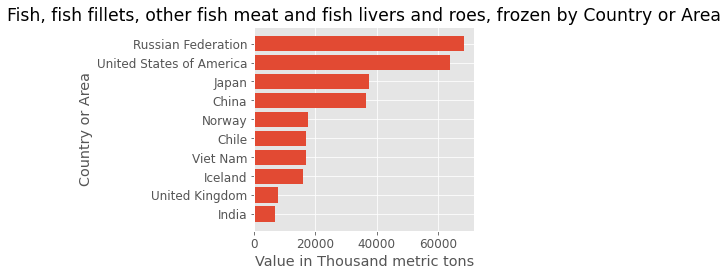

In [16]:
top_10_value = agg_value_stats['total_value'].sort_values(ascending=False).head(10)

fig, ax = plt.subplots()

hbars = ax.barh(top_10_value.keys(), top_10_value.values, align='center')
ax.invert_yaxis()                                                                                # labels read top-to-bottom
ax.set(xlabel='Value in Thousand metric tons', ylabel='Country or Area', title='Fish, fish fillets, other fish meat and fish livers and roes, frozen by Country or Area')

In [17]:
agg_value_stats['total_value'].sort_values(ascending=True).head(10)        # top ten country or area with the lowest total value

Country_or_Area
Malta                                        0.0
Algeria                                      0.0
Dominican Republic                           0.0
Slovenia                                     0.0
Austria                                      0.0
Malawi                                       0.0
Montenegro                                   0.0
Luxembourg                                   0.0
Zambia                                       0.0
The former Yugoslav Republic of Macedonia    0.0
Name: total_value, dtype: float64

# Country or Area Exploration

In [18]:
russia_df = country_area_grouped.get_group('Russian Federation')
russia_df.head(10)

,Country_or_Area,Year,Unit,Value
1569,Russian Federation,2016,Thousand metric tons,4028.65779
1570,Russian Federation,2015,Thousand metric tons,3829.43390
1571,Russian Federation,2014,Thousand metric tons,3725.38341
1572,Russian Federation,2013,Thousand metric tons,3788.75764
1573,Russian Federation,2012,Thousand metric tons,3689.05720
1574,Russian Federation,2011,Thousand metric tons,3642.43390
1575,Russian Federation,2010,Thousand metric tons,3555.83010
1576,Russian Federation,2009,Thousand metric tons,3632.29200
1577,Russian Federation,2008,Thousand metric tons,3401.33600
1578,Russian Federation,2007,Thousand metric tons,3499.72500


In [19]:
usa_df = country_area_grouped.get_group('United States of America')
usa_df.head(10)

,Country_or_Area,Year,Unit,Value
2025,United States of America,2005,Mil. USD,4947.000
2026,United States of America,2005,Thousand metric tons,1404.439
2027,United States of America,2004,Mil. USD,4142.000
2028,United States of America,2004,Thousand metric tons,1187.044
2029,United States of America,2003,Mil. USD,4589.000
2030,United States of America,2003,Thousand metric tons,1274.111
2031,United States of America,2002,Mil. USD,4680.000
2032,United States of America,2002,Thousand metric tons,1253.446
2033,United States of America,2001,Mil. USD,4910.000
2034,United States of America,2001,Thousand metric tons,1244.892


In [20]:
jpn_df = country_area_grouped.get_group('Japan')
jpn_df.head(10)

,Country_or_Area,Year,Unit,Value
922,Japan,2016,Thousand metric tons,1401.661
923,Japan,2015,Thousand metric tons,1416.228
924,Japan,2014,Thousand metric tons,1485.406
925,Japan,2013,Thousand metric tons,1382.604
926,Japan,2012,Thousand metric tons,1257.111
927,Japan,2011,Thousand metric tons,1250.647
928,Japan,2010,Thousand metric tons,1539.592
929,Japan,2009,Thousand metric tons,1615.983
930,Japan,2008,Thousand metric tons,1655.415
931,Japan,2007,Thousand metric tons,1657.243


In [21]:
china_df = country_area_grouped.get_group('China')
china_df.head(10)

,Country_or_Area,Year,Unit,Value
337,China,2003,Thousand metric tons,5675.672
338,China,2002,Thousand metric tons,5167.418
339,China,2001,Thousand metric tons,4434.193
340,China,2000,Thousand metric tons,4035.116
341,China,1999,Thousand metric tons,3733.630
342,China,1998,Thousand metric tons,3540.032
343,China,1997,Thousand metric tons,3380.229
344,China,1996,Thousand metric tons,3345.868
345,China,1995,Thousand metric tons,3205.307


In [22]:
norway_df = country_area_grouped.get_group('Norway')
norway_df.head(10)

,Country_or_Area,Year,Unit,Value
1353,Norway,2006,Mil. USD,1191.424116
1354,Norway,2006,Thousand metric tons,918.209000
1355,Norway,2005,Mil. USD,1282.266201
1356,Norway,2005,Thousand metric tons,1021.423000
1357,Norway,2004,Mil. USD,1096.348424
1358,Norway,2004,Thousand metric tons,960.275000
1359,Norway,2003,Mil. USD,1058.826213
1360,Norway,2003,Thousand metric tons,962.075000
1361,Norway,2002,Mil. USD,1077.399835
1362,Norway,2002,Thousand metric tons,1216.855000
